In [1]:
import time
import numpy as np
import skvideo.io 
import skimage.io as io
import skimage.transform as trans
import os
from skimage.feature import match_template
import skimage.color
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy.linalg import norm
from scipy import sum, average
%matplotlib inline
import cv2
import pytesseract
from PIL import Image

### Preliminary Information

    tile1 = (62,394)         Location of center pixel of first tile 

    tile1 = (15%,56%)        Percentage value for frame
    
    nexttile x+=18 y+=14     x and y aditions to get to tile on the right and bottom respectively

    numtiles x=18 y=15       number of tiles horizontally and vertically 
    
    frame[360:-90,50:-50,:]  playerboard dimensions 


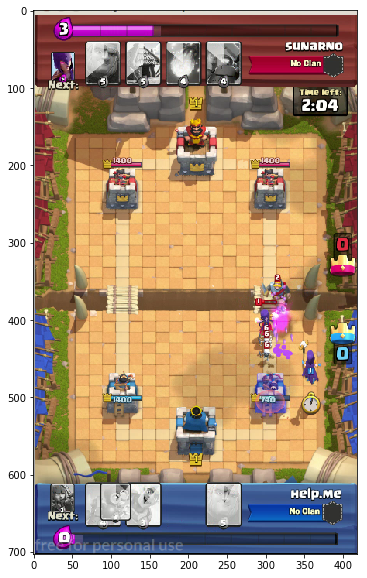

In [2]:
frame = plt.imread("ClashRoyalBot/Recorder/Data/demo.png")
plt.figure(figsize=(10,10))
plt.imshow(frame)

In [3]:
tile1x=0.15
tile1y=0.56
h,w,c=frame.shape

In [4]:
print(h,w,c)

703 418 4


In [5]:
startx=int(w*tile1x)
starty=int(np.around(h*tile1y))
print(startx,starty)

62 394


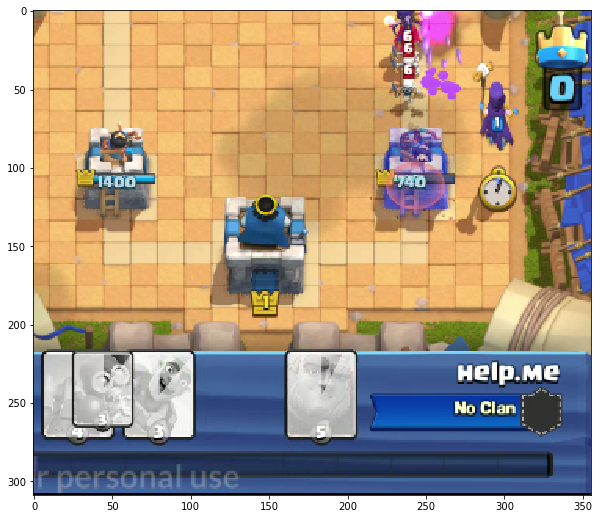

In [6]:
crop=frame[starty:,startx:,:]
plt.figure(figsize=(10,10))
plt.imshow(crop)

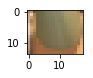

In [7]:
tile1=frame[starty-7:starty+7,startx-9:startx+9,:]
plt.figure(figsize=(1,1))
plt.imshow(tile1)

In [8]:
tile={}

x_coord=startx
y_coord=starty

xcounter=1

for i in range(1,271):
    tile[i]=(int(x_coord),int(y_coord))
    xcounter+=1
    if xcounter>18:
        x_coord=startx
        y_coord+=13.5
        xcounter=1
    else:
        x_coord+=17.5
    


270
(14, 18, 4)


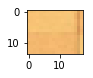

In [9]:
print(len(tile))
x,y=tile[250]
testtile=frame[y-7:y+7,x-9:x+9,:]
plt.figure(figsize=(1,1))
plt.imshow(testtile)
print (testtile.shape)

In [317]:
def tile_centr_to_box(tile):
    
    #returns box coordinates based on tile, tiel contains center coordiantes of tile
    
    x,y=tile
    xcoord=x-19
    xcoord2=x+19
    ycoord=y-12
    ycoord2=y+26
    return ycoord,ycoord2,xcoord,xcoord2

In [250]:
def pos_to_tile(x,y):
    return (x)+((y-1)*18)

(14, 18, 4)


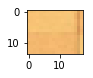

In [251]:
y1,y2,x1,x2=tile_centr_to_box(tile[pos_to_tile(18,9)])

clock=frame[y1:y2,x1:x2,:]
plt.figure(figsize=(1,1))
plt.imshow(testtile)
print (testtile.shape)

In [252]:
y1,y2,x1,x2=tile_centr_to_box(tile[pos_to_tile(18,9)])
plt.imsave("ClashRoyalBot/Recorder/Data/clock-start.jpg",frame[y1:y2,x1:x2,:])

In [253]:
def to_grayscale(arr):
    "If arr is a color image (3D array), convert it to grayscale (2D array)."
    if len(arr.shape) == 3:
        return average(arr, -1)  # average over the last axis (color channels)
    else:
        return arr

In [254]:
def normalize(arr):
    rng = arr.max()-arr.min()
    amin = arr.min()
    return (arr-amin)*255/rng

In [255]:
def compare_images(img1, img2):
    
    img1 = to_grayscale(img1.astype(float))
    img2 = to_grayscale(img2.astype(float))
    
    img1 = normalize(img1)
    img2 = normalize(img2)
    
    diff = img1 - img2
    
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    return (m_norm, z_norm)

image1


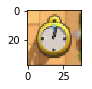

In [256]:
y1,y2,x1,x2=tile_centr_to_box(tile[pos_to_tile(18,9)])
clock=frame[y1:y2,x1:x2,:]

plt.figure(figsize=(1,1))
plt.imshow(clock)
print ("image1")

##### Testing on same image

In [257]:
l1,l2=compare_images(clock,clock)
print ("Manhattan norm:", l1)
print ("Zero norm:", l2)

Manhattan norm: 0.0
Zero norm: 0.0


##### Testing on different clock - clock shows full timer

image2


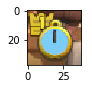

In [258]:
frame2 = plt.imread("ClashRoyalBot/Recorder/Data/temp.png")

y1,y2,x1,x2=tile_centr_to_box(tile[pos_to_tile(10,15)])
clock2=frame2[y1:y2,x1:x2,:]

plt.figure(figsize=(1,1))
plt.imshow(clock2)
print ("image2")

In [259]:
l1,l2=compare_images(clock,clock2)
print ("Manhattan norm:", l1)
print ("Zero norm:", l2)

Manhattan norm: 94863.3983845
Zero norm: 1444.0


##### Testing on entirely different tiles

image3


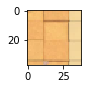

In [260]:
y1,y2,x1,x2=tile_centr_to_box(tile[pos_to_tile(3,2)])
tile_to_test=frame[y1:y2,x1:x2,:]

plt.figure(figsize=(1,1))
plt.imshow(tile_to_test)
print ("image3")

In [261]:
l1,l2=compare_images(clock,tile_to_test)
print ("Manhattan norm:", l1)
print ("Zero norm:", l2)

Manhattan norm: 87899.006472
Zero norm: 1444.0


##### Testing on different clock - clock shows initial timer

image4


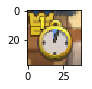

In [262]:
frame3 = plt.imread("ClashRoyalBot/Recorder/Data/raw/temp_242.png")

y1,y2,x1,x2=tile_centr_to_box(tile[pos_to_tile(10,15)])
clock3=frame3[y1:y2,x1:x2,:]

plt.figure(figsize=(1,1))
plt.imshow(clock3)
print ("image4")

In [263]:
l1,l2=compare_images(clock,clock3)
print ("Manhattan norm:", l1)
print ("Zero norm:", l2)

Manhattan norm: 93014.8361989
Zero norm: 1444.0


##### Clock edge detection

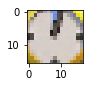

In [264]:
y1,y2,x1,x2=tile_centr_to_box(tile[pos_to_tile(18,9)])
clock=frame[y1+12:y2-10,x1+10:x2-11,:]
plt.figure(figsize=(1,1))
plt.imshow(clock)
plt.imsave("ClashRoyalBot/Recorder/Data/clock-small.png",clock)

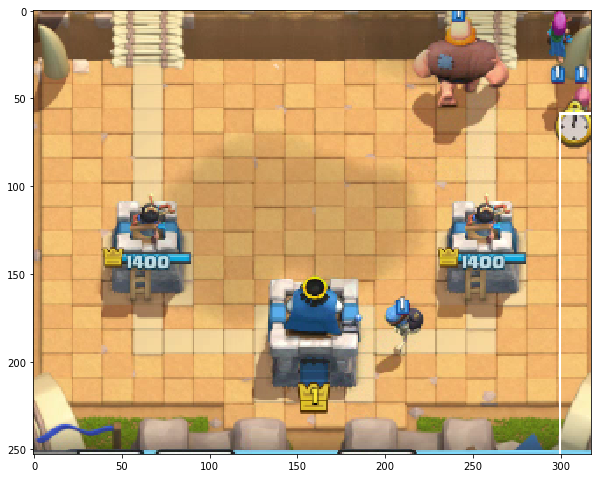

In [265]:
testframe = plt.imread("ClashRoyalBot/Recorder/Data/raw/temp_500.png")
testframe=testframe[360:-90,50:-50,:]
clock_gray = cv2.cvtColor(clock, cv2.COLOR_RGB2GRAY)
frame_gray = cv2.cvtColor(testframe, cv2.COLOR_RGB2GRAY)

res = cv2.matchTemplate(frame_gray,clock_gray,cv2.TM_CCOEFF_NORMED)
threshold = 0.60

loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(testframe, pt, (pt[0] + w, pt[1] + h), (255,1,0), 1)

plt.figure(figsize=(10,10))
plt.imshow(testframe)

In [321]:
def findClock(frame,clock):
    
    clock_gray = cv2.cvtColor(clock, cv2.COLOR_RGB2GRAY)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    res = cv2.matchTemplate(frame_gray,clock_gray,cv2.TM_CCOEFF_NORMED)
    threshold = 0.6

    loc = np.where( res >= threshold)
    
    _,found=np.shape(loc)
    
    if found>0:
        return loc[0][-1],loc[1][-1] ## y, x
    else:
        return -1,-1

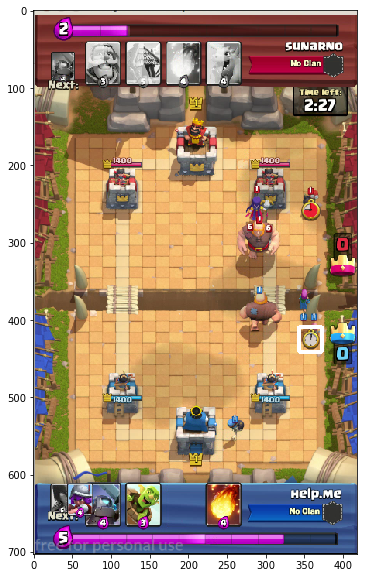

In [328]:
clock = plt.imread("ClashRoyalBot/Recorder/Data/clock-small.png")

testframe2 = plt.imread("ClashRoyalBot/Recorder/Data/raw/temp_500.png")
frametofind=testframe2[360:-90,50:-50,:]
y,x=findClock(frametofind,clock)

fcopy=testframe2

if x<0 and y<0:
    print ("no clock found")
else:
    y+=360
    x+=50
    cv2.rectangle(fcopy, (x-7,y-10),(x+22,y+22),color=(225,225,225),thickness= 3)

plt.figure(figsize=(10,10))
plt.imshow(fcopy)

In [330]:
def getTileNumber(x,y):
    
    y+=4
    x+=6
    #Adjust found clock coordinates to represent center of clock
    
    for t in tile:
        tx,ty=tile[t]
        if ((x<tx+9) and (x>tx-9)) and ((y<ty+7) and (y>ty-7)) :
            return t

    print("ERROR:  coordinates out of board ")
    
    '''
    function can be vectorized by reoving loop
    (x-tile 1 x coords)/18 will give x tile number
    (y-tile 1 y coords)/15 will give y tile number
    use pos_to_tile to get exact tile number
    '''
    

In [338]:
def getTileNumber_Faster(x,y):
    
    tx,ty=tile[1]
    x-=tx
    y-=ty
    
    xind=int(np.around(x/18))
    yind=int(np.around(y/15))
    
    return pos_to_tile(xind,yind)

    '''
    implmentation of above mentioned method - faulty logic
    imporve if forloop to costly in mass data processing
    '''

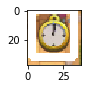

In [336]:
#Checking validity of function getTileNuumber
y1,y2,x1,x2=tile_centr_to_box(tile[getTileNumber(x,y)])
funcisvalid=fcopy[y1:y2,x1:x2,:]

plt.figure(figsize=(1,1))
plt.imshow(funcisvalid)